## Import all packages

In [1]:
import pandas as pd
import numpy as np 
import scipy
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from sklearn.cluster import KMeans

## Import data

In [2]:
df = pd.read_csv("../data/segmentation_data.csv",index_col=0)

## Explore data

In [3]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Correlation

Text(0.5, 1.0, 'Correlation Heatmap')

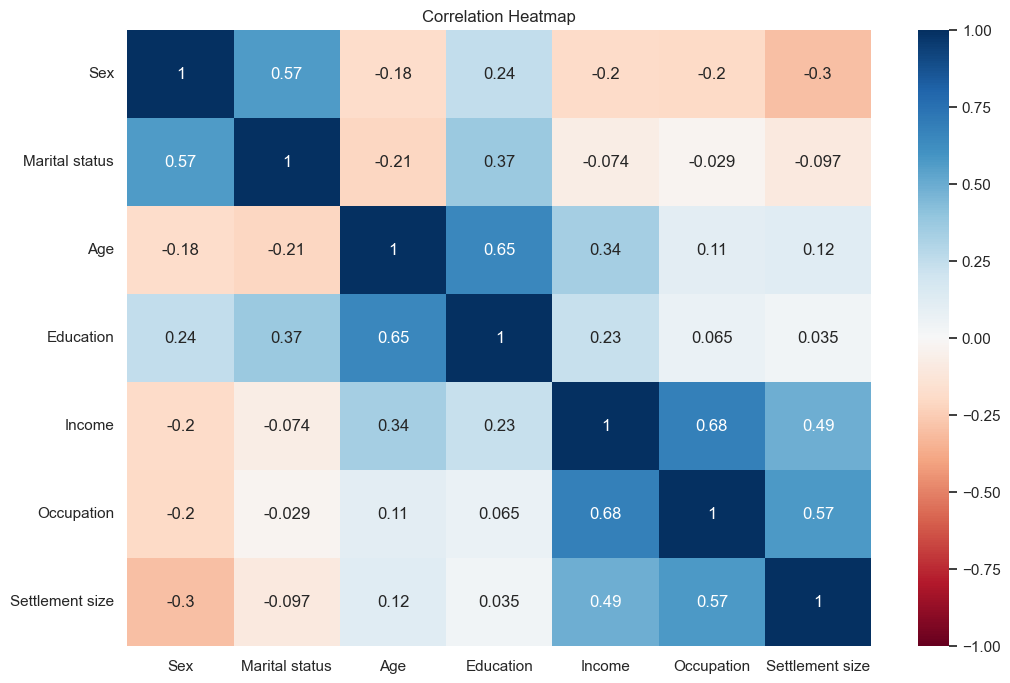

In [8]:
plt.figure(figsize=(12,8))
sb.heatmap(df.corr(),annot=True,
           cmap='RdBu',
           vmax=1,
           vmin=-1)
plt.title("Correlation Heatmap")

## Visualize raw data

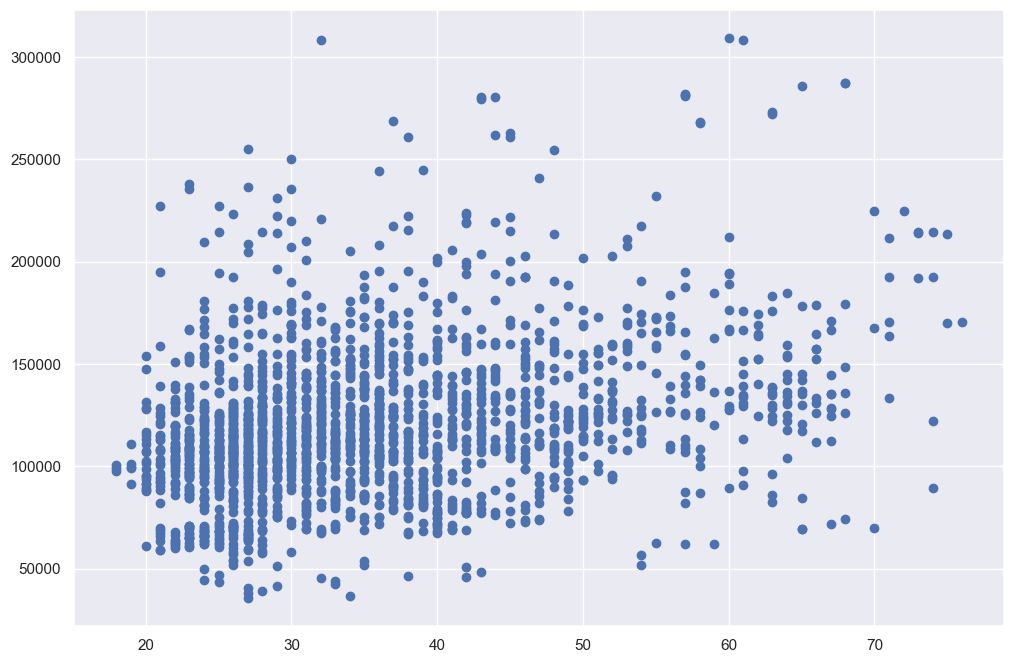

In [12]:

plt.figure(figsize=(12,8))
plt.scatter(df['Age'],df['Income'])

## Standardization

In [76]:
scaler = StandardScaler()

In [77]:
df_std = scaler.fit_transform(df)

## K-means clustering

In [67]:
from sklearn.cluster import KMeans

### Define number of clusters

14000.000000000004
10514.558847734454
8630.913216898227
7169.870822465847
6403.134167928614
5830.956302961156
5378.854705323014
5005.134609766619
4724.527779695853
4295.656622405145


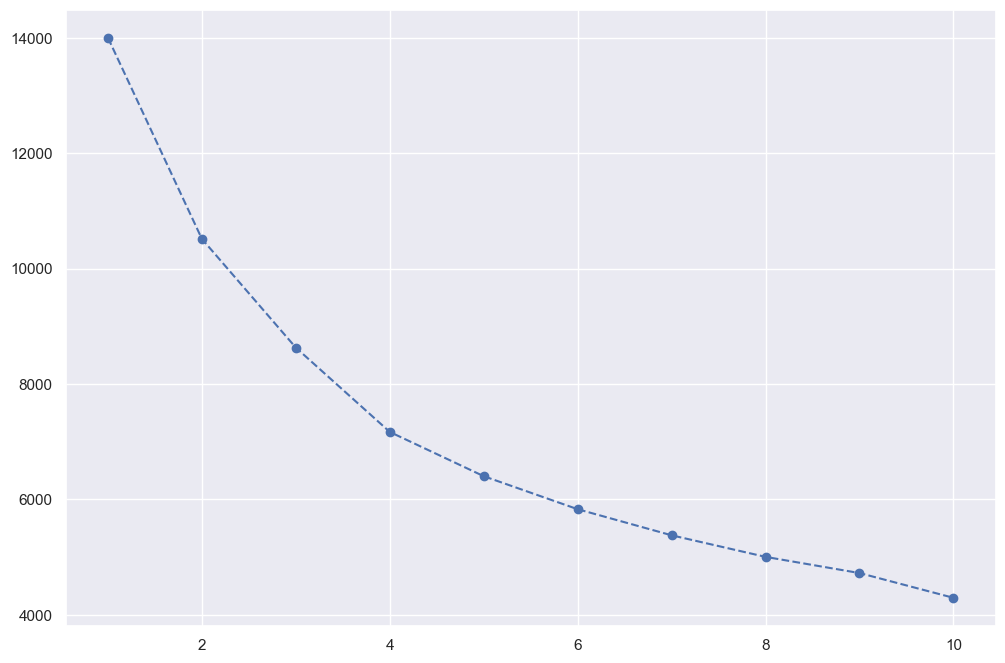

In [96]:
wcss = []
X=df_std
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42,init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
    
    
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss,marker='o', linestyle='dashed')
plt.show()


## Clustring

In [94]:
X=df_std

In [113]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [114]:

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

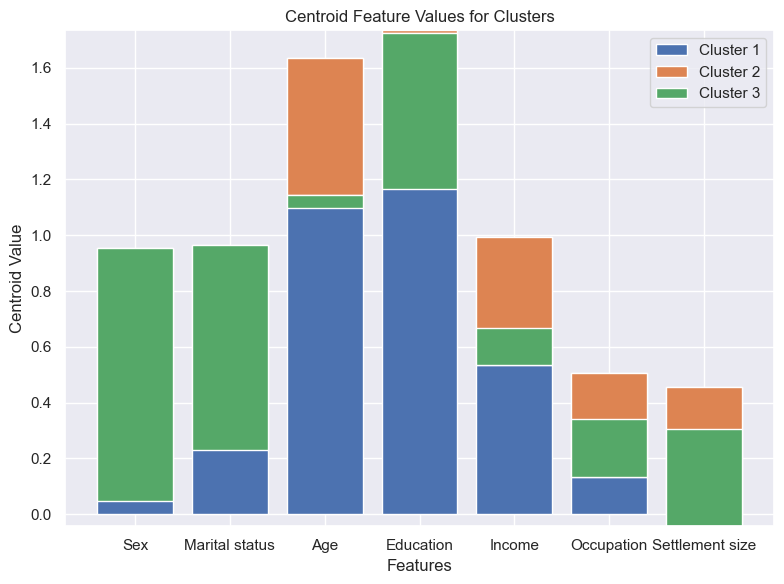

In [115]:
# Plot centroid feature values
plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), centroids[0], label='Cluster 1')
plt.bar(range(X.shape[1]), centroids[1], label='Cluster 2', bottom=centroids[0])
plt.bar(range(X.shape[1]), centroids[2], label='Cluster 3', bottom=centroids[0] + centroids[1])
plt.xlabel('Features')
plt.ylabel('Centroid Value')
plt.title('Centroid Feature Values for Clusters')
plt.xticks(range(X.shape[1]), df.columns)
plt.legend()
plt.tight_layout()
plt.show()

## Approach 1: 
### Finding Absolute difference of  each cluster centroid and mean of features.Helps in understanding how each individual feature contributed to the uniquesness of each cluster seperately

Cluster 1 - Top 3 important features:
- Income
- Age
- Education

Cluster 2 - Top 3 important features:
- Settlement size
- Marital status
- Sex

Cluster 3 - Top 3 important features:
- Education
- Marital status
- Sex



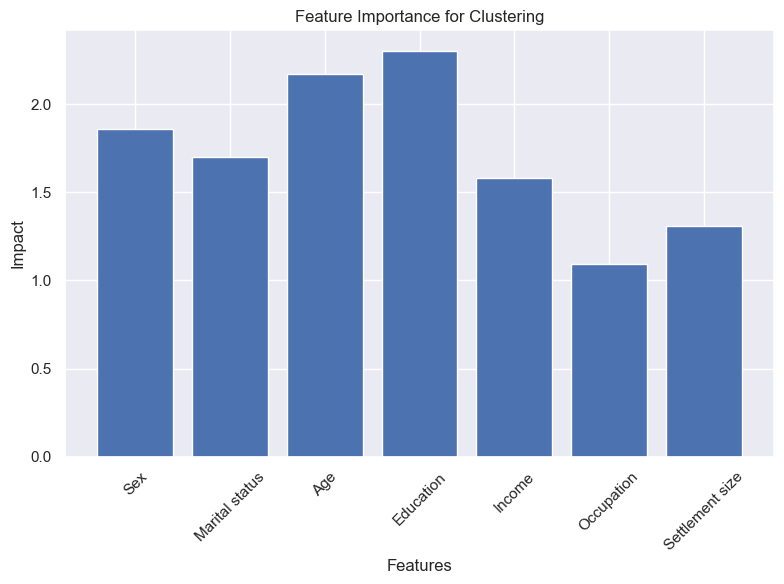

In [128]:
mean_feature_values = np.mean(X, axis=0)
centroid_diff = centroids - mean_feature_values
centroid_importance = np.abs(centroid_diff)
num_top_features = 3
top_features_indices = np.argsort(centroid_importance, axis=1)[:, -num_top_features:]
feature_names = df.columns

for cluster_idx in range(n_clusters):
    print(f"Cluster {cluster_idx + 1} - Top {num_top_features} important features:")
    for feature_idx in top_features_indices[cluster_idx]:
        print(f"- {feature_names[feature_idx]}")
    print()
    
feature_importance_scores = np.sum(np.abs(centroid_diff), axis=0)
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importance_scores)
plt.xlabel('Features')
plt.ylabel('Impact')
plt.title('Feature Importance for Clustering')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
    

### Optimal way to choose the important features 

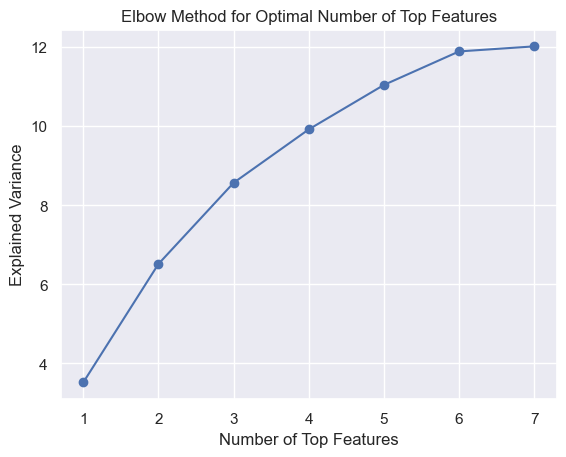

In [130]:
# Calculate explained variance for different numbers of features
explained_variance = []
num_features_range = range(1, X.shape[1] + 1)
for num_features in num_features_range:
    top_features_indices = np.argsort(centroid_importance, axis=1)[:, -num_features:]
    explained_variance.append(np.sum(centroid_importance[np.arange(n_clusters)[:, np.newaxis], top_features_indices]))

# Plot the explained variance
plt.plot(num_features_range, explained_variance, marker='o')
plt.xlabel('Number of Top Features')
plt.ylabel('Explained Variance')
plt.title('Elbow Method for Optimal Number of Top Features')
plt.show()

## Approach 2
### Considering all the clusters while comapring with each feature
### It gives collective view of how features contributing to overall clusters

In [132]:
# Calculate sum of centroids and mean feature values
sum_of_centroids = np.sum(centroids, axis=0)
mean_feature_values = np.mean(X, axis=0)

# Compute differences
differences = sum_of_centroids - mean_feature_values

# Rank features based on differences
feature_ranking = np.argsort(np.abs(differences))[::-1]

# Print ranked features
print("Ranking of features based on differences:")
for rank, feature_idx in enumerate(feature_ranking):
    print(f"{rank + 1}.  {feature_names[feature_idx]}: {differences[feature_idx]}")


Ranking of features based on differences:
1.  Education: 1.1650341122041743
2.  Age: 1.0989693103228149
3.  Income: 0.6670067687021851
4.  Occupation: 0.34115628921848895
5.  Settlement size: 0.30671949152882677
6.  Marital status: 0.22861134415869294
7.  Sex: 0.048418736166062765
